In [73]:
import pandas as pd
import numpy as np

In [74]:
df=pd.read_csv('spam.csv',encoding='latin')

In [76]:
df.sample(5)

,v1,v2
2597,ham,"Got fujitsu, ibm, hp, toshiba... Got a lot of ..."
1148,ham,I'm not driving... Raining! Then i'll get caug...
2427,ham,Do you think i can move &lt;#&gt; in a week
1362,ham,What does the dance river do?
4899,spam,"ou are guaranteed the latest Nokia Phone, a 40..."


In [77]:
df.shape

(5572, 2)

1.data cleaning

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [79]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [80]:
df.sample(5)

,target,message
3825,ham,"Goodmorning,my grandfather expired..so am on l..."
3049,ham,Ok
2646,ham,"Em, its olowoyey@ usc.edu have a great time in..."
2479,spam,Sppok up ur mob with a Halloween collection of...
1617,ham,Did u download the fring app?


In [81]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [82]:
df['target']=encoder.fit_transform(df['target'])

In [83]:
df.sample(5)

,target,message
226,1,Will u meet ur dream partner soon? Is ur caree...
1556,0,Good sleep is about rhythm. The person has to ...
43,0,WHO ARE YOU SEEING?
1370,0,Hope you are feeling great. Pls fill me in. Ab...
3953,0,I probably won't eat at all today. I think I'm...


In [84]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [85]:
df.duplicated().sum()

401

In [86]:
df=df.drop_duplicates(keep='first')

In [87]:
df.duplicated().sum()

0

In [88]:
df.shape

(5171, 2)

2.EDA

In [89]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar then Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
df['target'].value_counts()

target
0    4518
1     653
Name: count, dtype: int64

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

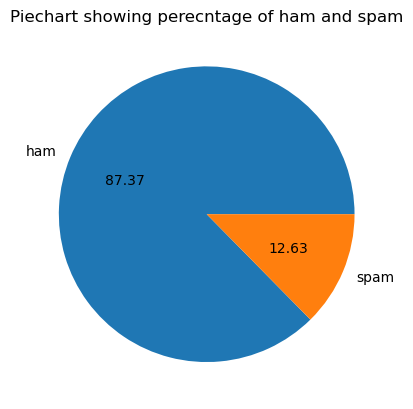

In [92]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.title("Piechart showing perecntage of ham and spam")
plt.show()

In [93]:
import nltk

In [94]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
df['num_charecters']=df['message'].apply(len)

In [97]:
df.sample(5)

,target,message,num_charecters
2884,0,ÌÏ still attending da talks?,28
3606,0,I have no idea where you are,28
126,0,"Just so that you know,yetunde hasn't sent mone...",244
4558,0,Think + da. You wil do.,23
5551,0,Wen did you get so spiritual and deep. That's ...,51


In [98]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [99]:
df.sample(5)

,target,message,num_charecters,num_words
1490,0,Cant believe i said so many things to you this...,172,38
2952,1,"URGENT! Your mobile was awarded a å£1,500 Bonu...",120,23
1500,0,Host-based IDPS for linux systems.,34,6
687,0,"Dear,Me at cherthala.in case u r coming cochin...",169,33
5012,0,"Uncle G, just checking up on you. Do have a re...",59,14


In [100]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [101]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences
190,1,Are you unique enough? Find out from 30th Augu...,72,12,3
2109,0,Lara said she can loan me &lt;#&gt; .,38,14,1
3383,1,FREE MSG:We billed your mobile number by mista...,160,27,1
4907,0,"I'm in solihull, | do you want anything?",40,11,1
2943,1,We currently have a message awaiting your coll...,100,17,2


In [102]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,79.591568,18.606652,1.974280
std,58.591487,13.424824,1.466029
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [103]:
#ham messages
df[df['target']==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.131253,17.287074,1.829128
std,56.861084,13.618450,1.404481
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [104]:
#spam messages
df[df['target']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.00000
mean,138.127106,27.736600,2.97856
std,29.910358,6.976813,1.49010
min,13.000000,2.000000,1.00000
25%,132.000000,25.000000,2.00000
50%,149.000000,29.000000,3.00000
75%,157.000000,32.000000,4.00000
max,224.000000,46.000000,9.00000


<Axes: xlabel='num_charecters', ylabel='Count'>

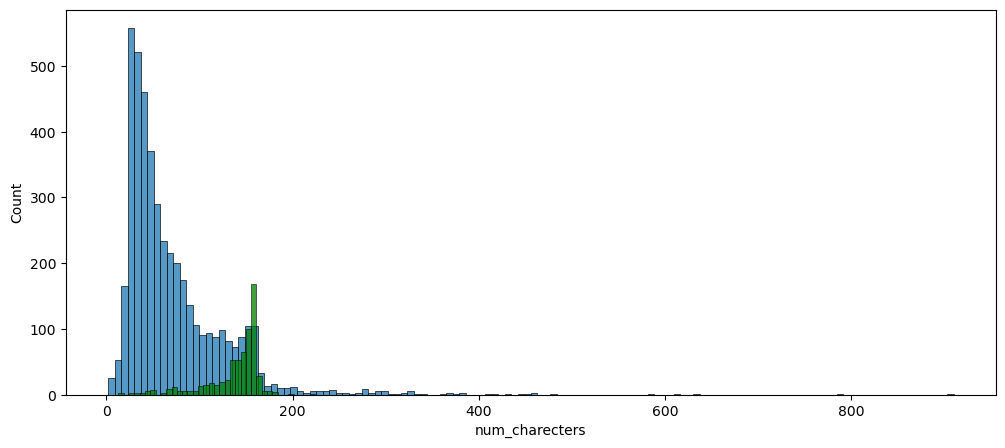

In [105]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

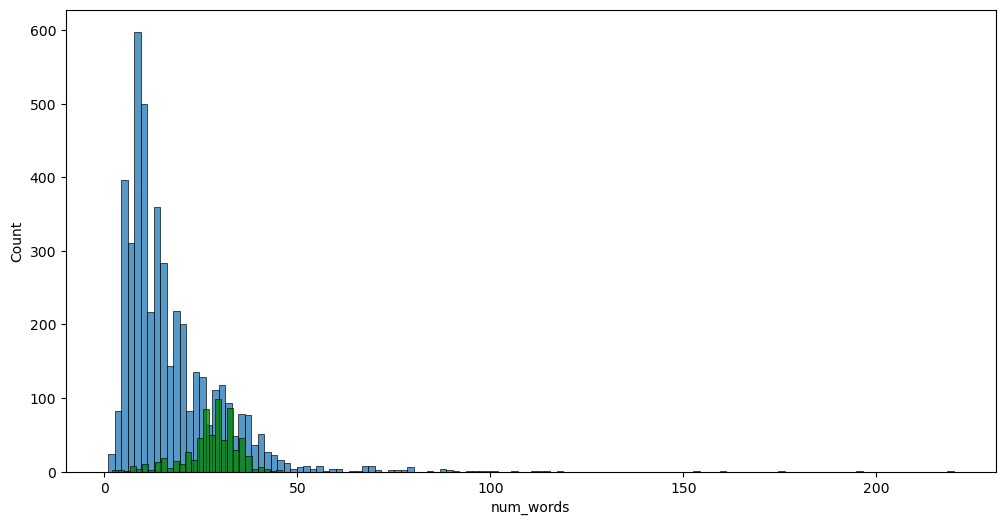

In [106]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

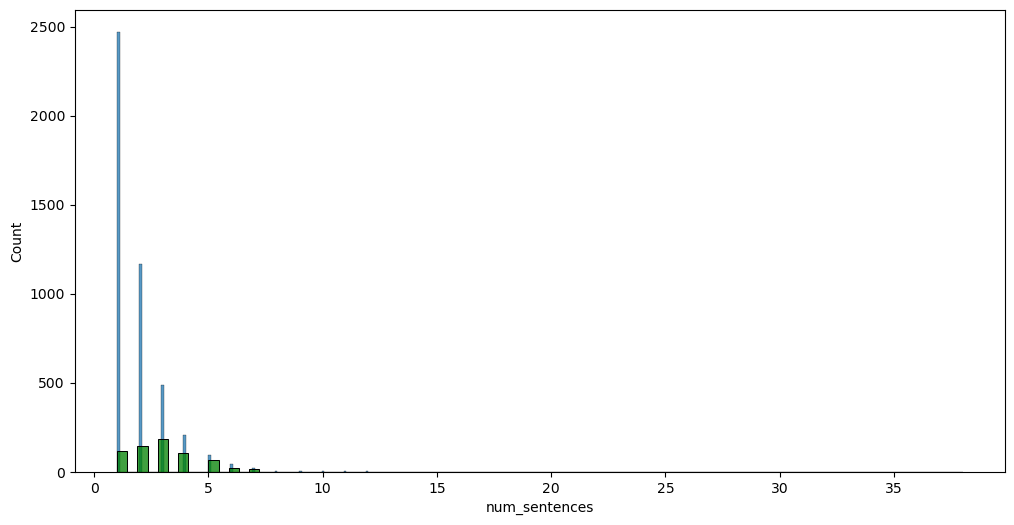

In [107]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='green')

c:\Users\user\anaconda\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


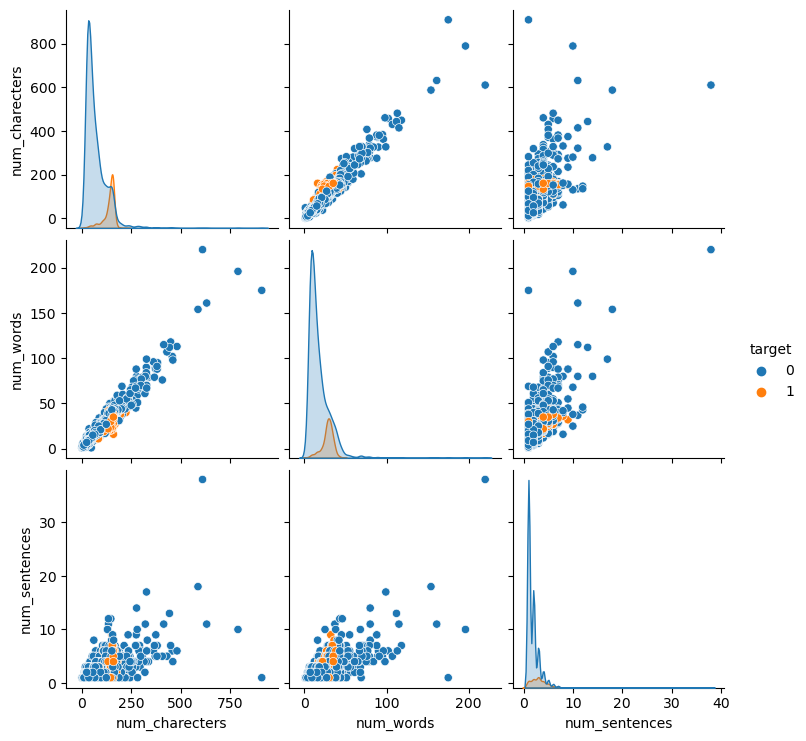

In [108]:
sns.pairplot(df,hue='target')

<Axes: >

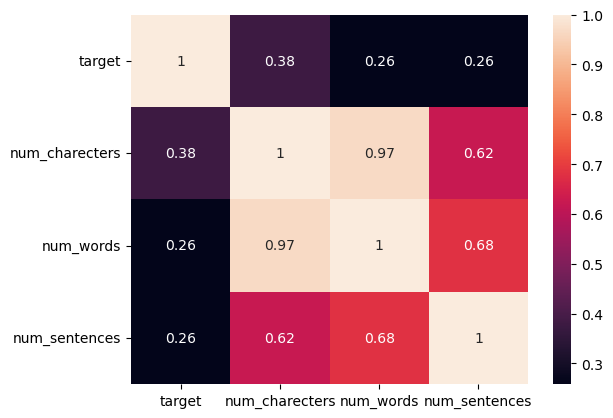

In [109]:
sns.heatmap(df[['target','num_charecters','num_words','num_sentences']].corr(),annot=True)

3.Data preprocessing

In [110]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [111]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
ps=PorterStemmer()

In [113]:
def transform_text(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for j in message:
        y.append(ps.stem(j))
    
            
    return " ".join(y)



In [114]:
transform_text("i am talking to you")

'talk'

In [115]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences
2822,0,Then u ask darren go n pick u lor... But i oso...,74,20,2
1079,0,Me too watching surya movie only. . .after 6 p...,67,14,3
607,0,what I meant to say is cant wait to see u agai...,87,18,1
165,0,I place all ur points on e cultures module alr...,51,11,1
5396,0,As in i want custom officer discount oh.,40,9,1


In [117]:
df['transform_text']=df['message'].apply(transform_text)

In [118]:
df.head()

,target,message,num_charecters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar then Joking wif u oni,30,7,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [119]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [120]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

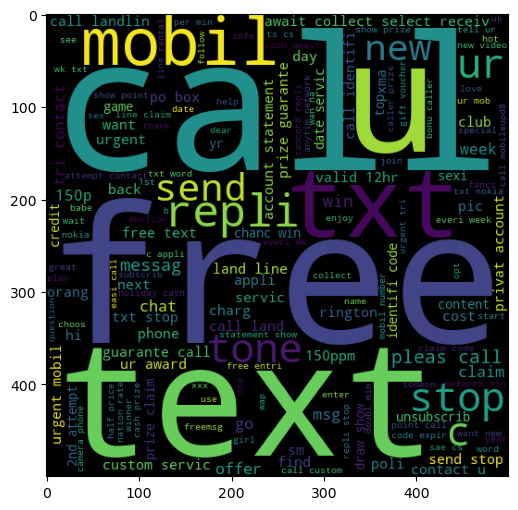

In [121]:
#spam messages display
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

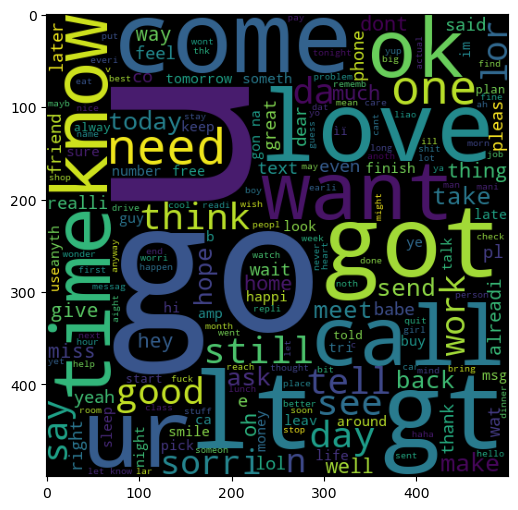

In [122]:
#ham messages display
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [123]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences,transform_text
5078,0,Mark works tomorrow. He gets out at 5. His wor...,93,23,3,mark work tomorrow get work hous meet u afterward
2602,0,So when you gonna get rimac access,35,8,1,gon na get rimac access
1081,0,Can u get pic msgs to your phone?,33,9,1,u get pic msg phone
314,0,You made my day. Do have a great day too.,41,12,2,made day great day
3973,0,Roger that. WeÛ÷re probably going to rem in a...,53,11,2,roger probabl go rem 20


In [124]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
len(spam_corpus)

9959

In [125]:
from collections import Counter

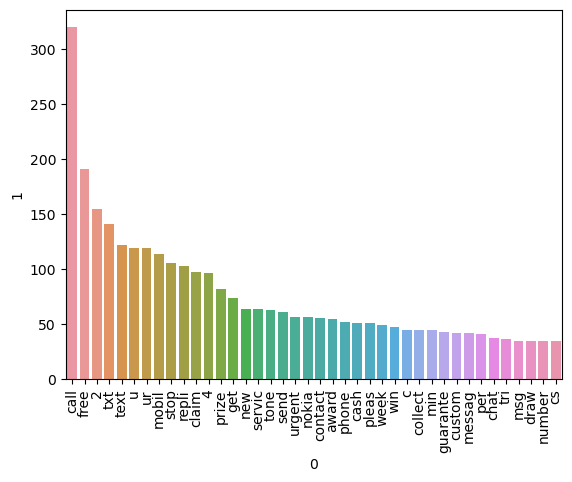

In [126]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(40))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [127]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35758

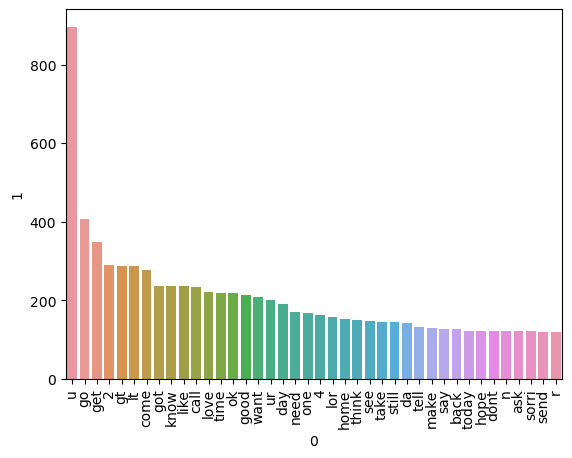

In [128]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(40))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

4.Model Building

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [131]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [134]:
x.shape

(5171, 3000)

In [135]:
y=df['target'].values

In [136]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [147]:
gnb=GaussianNB()
mnb=MultinomialNB()

In [148]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8714975845410629
[[792 111]
 [ 22 110]]
0.497737556561086


In [150]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.978743961352657
[[897   6]
 [ 16 116]]
0.9508196721311475


Importing Pickle

In [151]:
import pickle
pickle.dump(tfidf,open('tfidfvectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))